In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

sns.set_style('ticks')

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Завдання

## Про що дані?

Якщо звернути увагу на таблицю нижче, то можемо зрозуміти, що працюємо з даними про рівень життя в різних країнах. Для кожної країни ми знаємо її глобальний рейтинг, показник ВВП на душу населення, рівень соціальної підтримки, очікування здорового життя, показник свободи прийняття рішень, рівень щедрості та рівень сприйняття корупції

In [2]:
df = pd.read_csv('2019.csv', index_col='Overall rank')
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


In [4]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Додамо якісний стовпчик, який показуватиме умовний ріень життя для кожної країни (`Low < Medium < High`). Визначаємо ці значення зі стовпчика `Score` так, що `Low` $\in [2, 4]$, `Medium` $\in (4, 6]$, `High` $\in (6, 8]$

In [5]:
df.insert(
    1, 'Level of Life', pd.cut(df['Score'], [2, 4, 6, 8], labels=['Low', 'Medium', 'High'])
)

In [6]:
df.head()

,Country or region,Level of Life,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,,
1,Finland,High,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,High,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,High,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,High,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,High,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Матриця розсіяння з `KDE Plot`

Такі графіки хороші тим, що можна однією командою побачити загальну картину датасету.

Недіагональні елементи цього графіка складаються з графіків `Scatter Plot`. Такі графіки просто відображають кожен рядок датасету як точку у відповідному просторі. Щоправда у моємо випадку ці точки ще розділені на семантичні групи по рівню життя.

`Scatter Plot` може бути зручний, щоб висвітлити кореляцію між змінними. В реальних данних рідко можна помітити явну кореляцію без статистичних тестів або додаткових дій, проте в цьому датасеті можемо навіть візуально побачити кореляцію, наприклад, стовчика `Score` із такими стовпцями як `GDP per capita, Social support, Healthy life expectancy`.

По діагоналі на цьому графіку відображені графіки розподілу `KDE Plot` про які я згадаю пізніше.

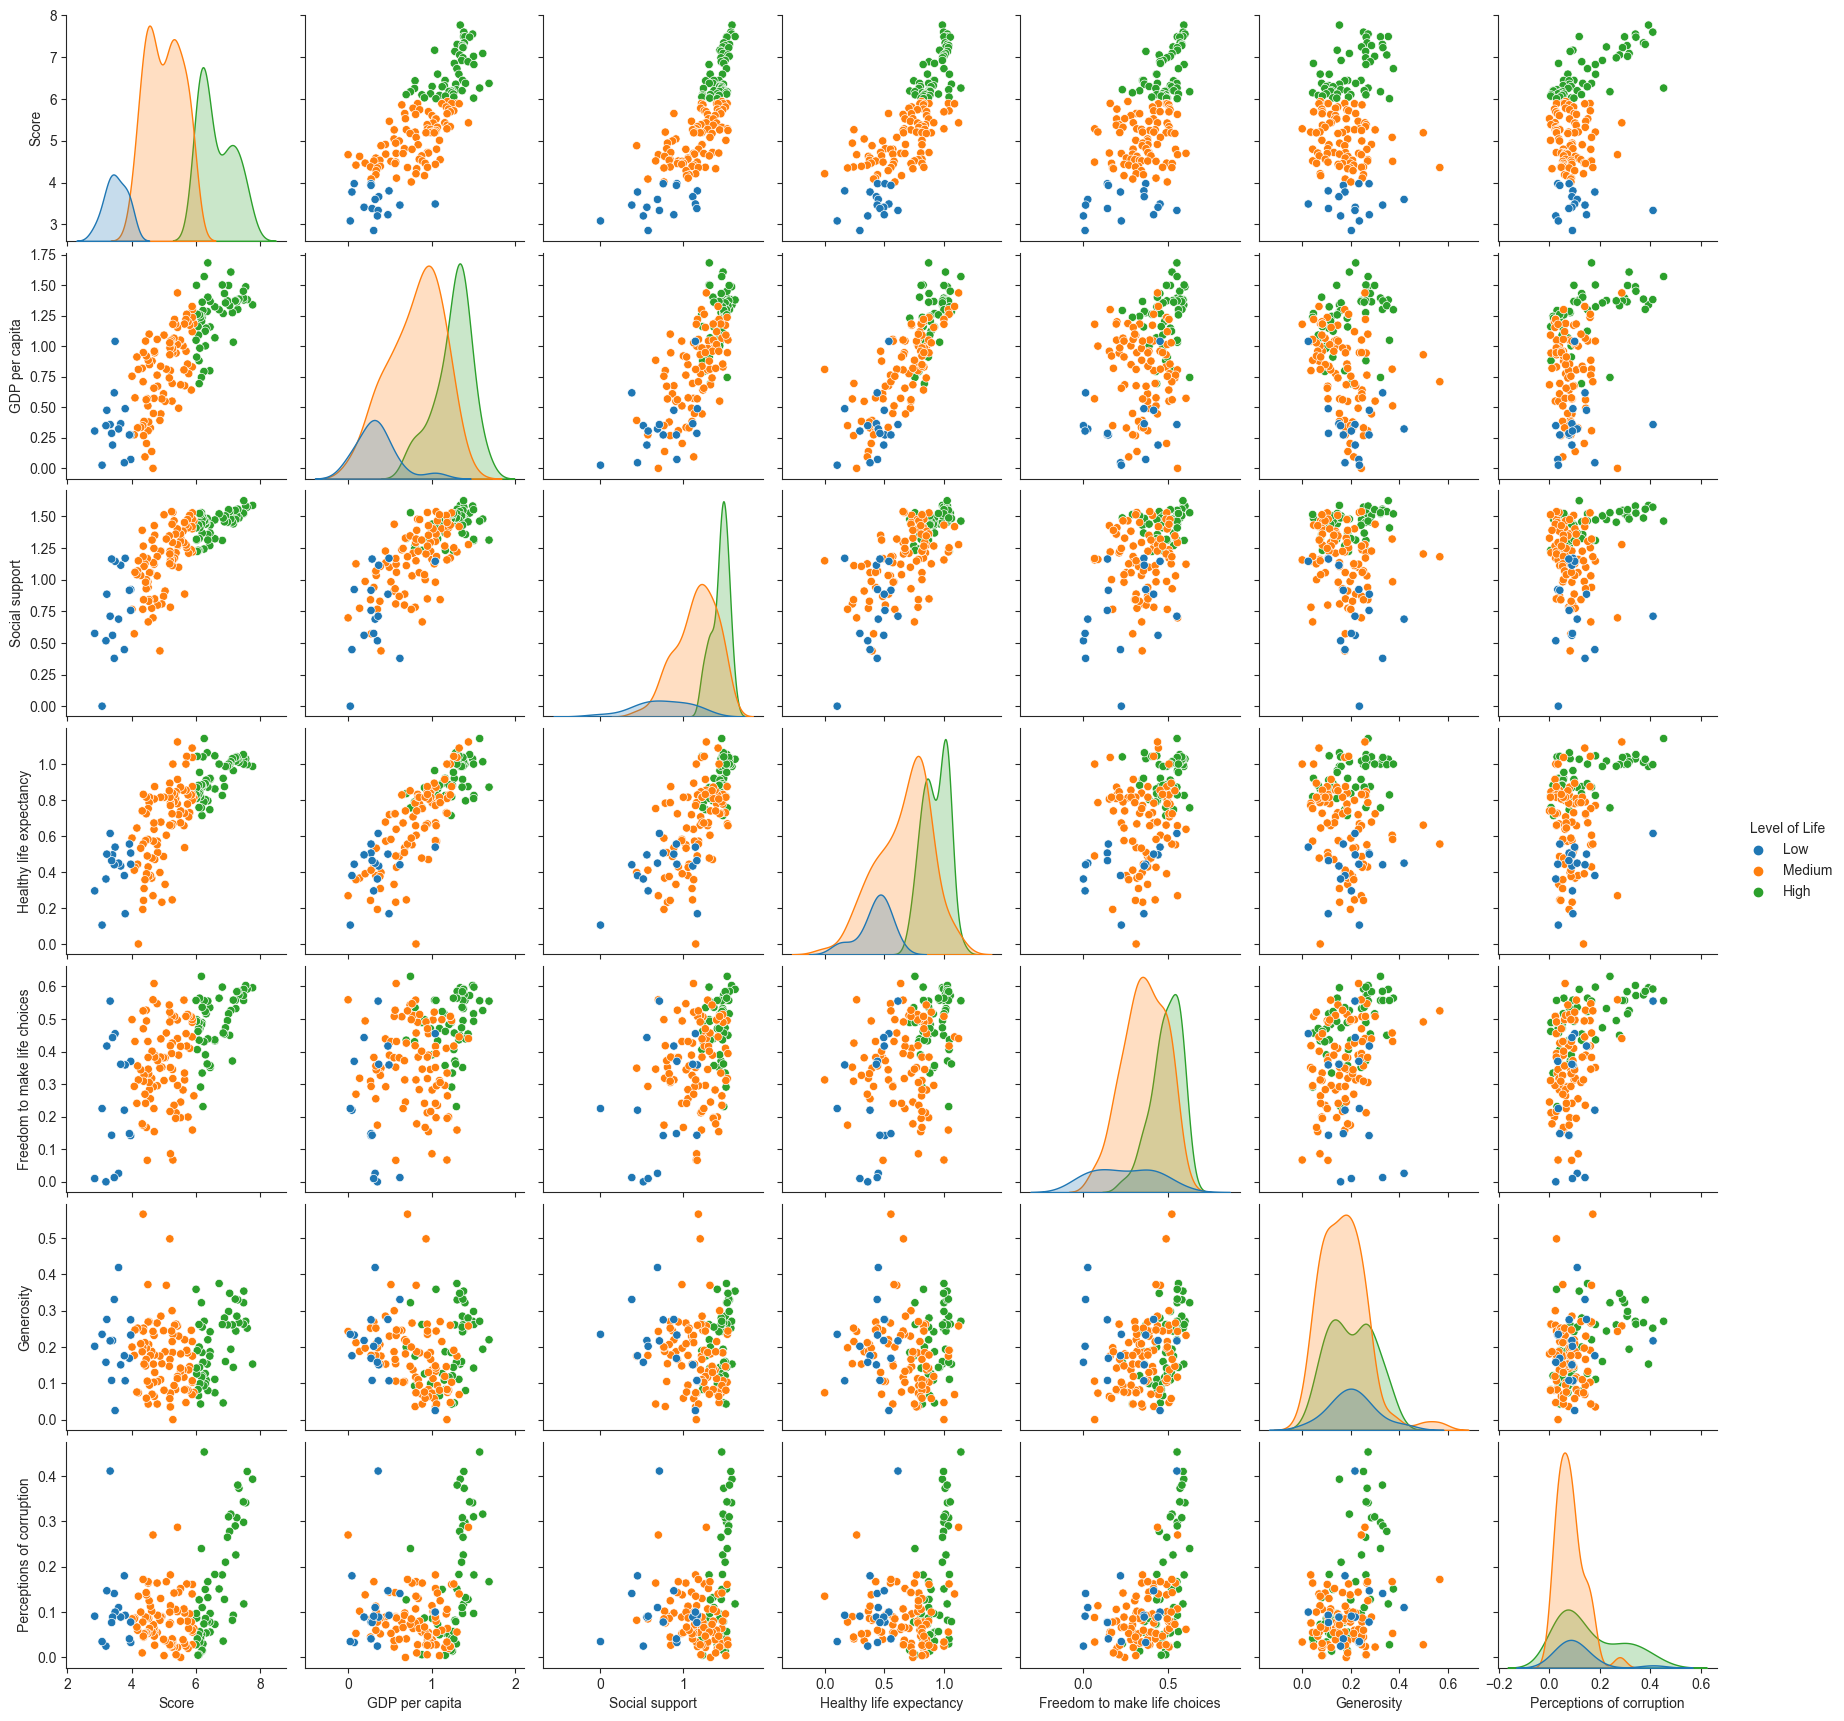

In [7]:
sns.pairplot(df, hue='Level of Life');

## Графіки кореляцій

### Матриця кореляцій

Підтвердимо візуальну кореляцію цифрами.

Ми можемо порахувати коефіцієнт кореляції між усіма числовими стовпцями датасету за допомогою методу `df.corr()`, і візуалізувати отриману матрицю за допомогою графіку `sns.heatmap()`.

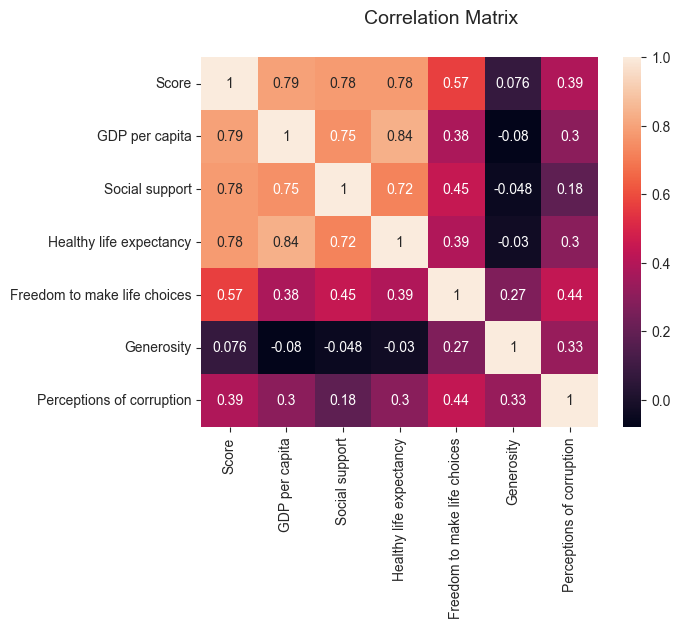

In [8]:
plt.suptitle('Correlation Matrix', fontsize=14)
sns.heatmap(df.corr(), annot=True);

### Графік регресії

Оскільки ми переконалися, що між багатьма змінними існує кореляція, можемо собі дозволити побудувати графік регресії.

На графіку окрім звичного нам `Scatter Plot`, можемо побачити апроксимуючу пряму, яка побудована за методом лінійної регресії. Ми знаємо що рівняння прямої має наступний вигляд: $$y = ax + b$$

На графіку нижче $y = $ ВВП, $х = $ Показник очікування здорового життя.   
Метод лінійної регресії підбере такі коефіцієнти $a$ і $b$, щоб як умога краще апроксимувати наші дані. Оскільки в цьому випадку маємо майже лінійну залежність, отримуємо гарну точність.

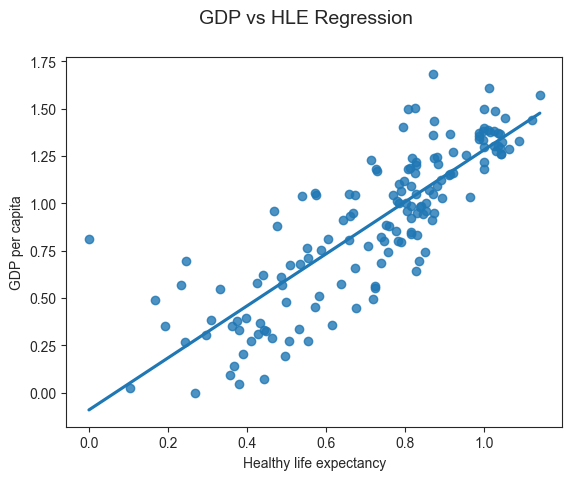

In [9]:
plt.suptitle('GDP vs HLE Regression', fontsize=14)
sns.regplot(data=df, x='Healthy life expectancy', y='GDP per capita', ci=None);

## Графіки розподілу даних

### Boxplot

`Boxplot` - це графік який дозволяє оцінити розподіл даних використовуючи 5 значень:
- Мінімальне значення вибірки
- Перший квартиль (25-ий перцентиль)
- Медіана (50-ий перцентиль)
- Третій квартиль (75-ий перцентиль)
- Максмальне значення вибірки  

`Boxplot` дозволяє оцінити такі параметри розподілу як щільність, симетричність та зсув даних. Також дозволяє побачити зсув розподілу.   
Проте, оскільки `Boxplot` використовує тільки квантилі для аналізу, він не адаптується поки ми не змінимо квантилі. (Гістограми будуть різні, а `Boxplot`'и однакові) 

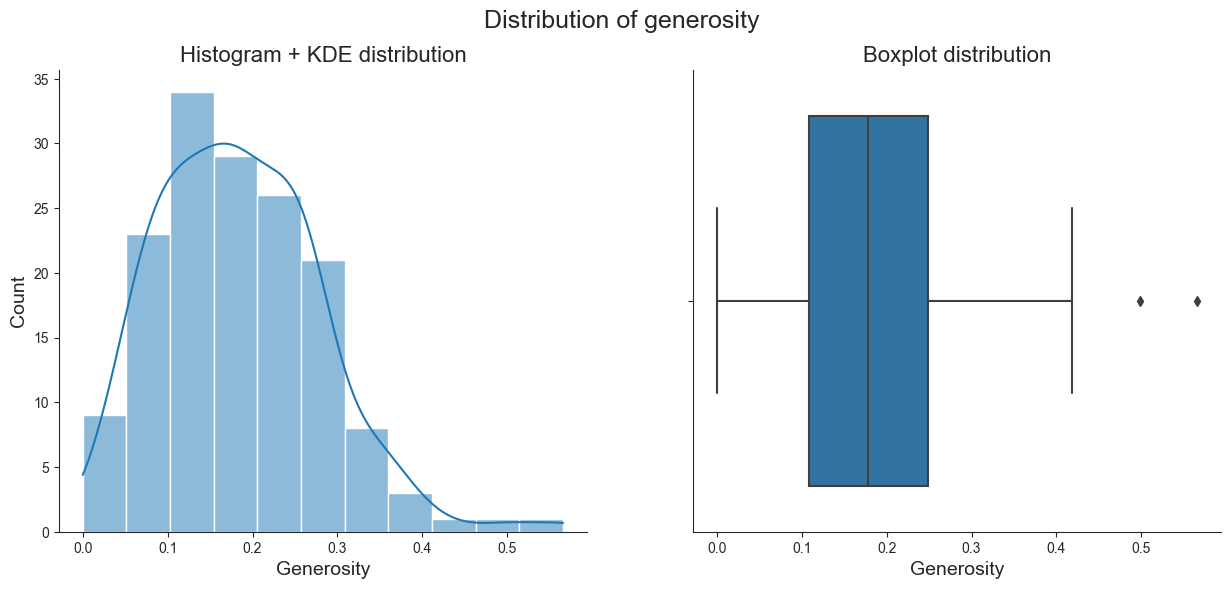

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
fig.suptitle('Distribution of generosity', fontsize=18)

sns.histplot(x=df['Generosity'], kde=True, ax=ax[0])
ax[0].set_xlabel('Generosity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_title('Histogram + KDE distribution', fontsize=16)

sns.boxplot(x=df['Generosity'], ax=ax[1])
ax[1].set_title('Boxplot distribution', fontsize=16)
ax[1].set_xlabel('Generosity', fontsize=14)

sns.despine()

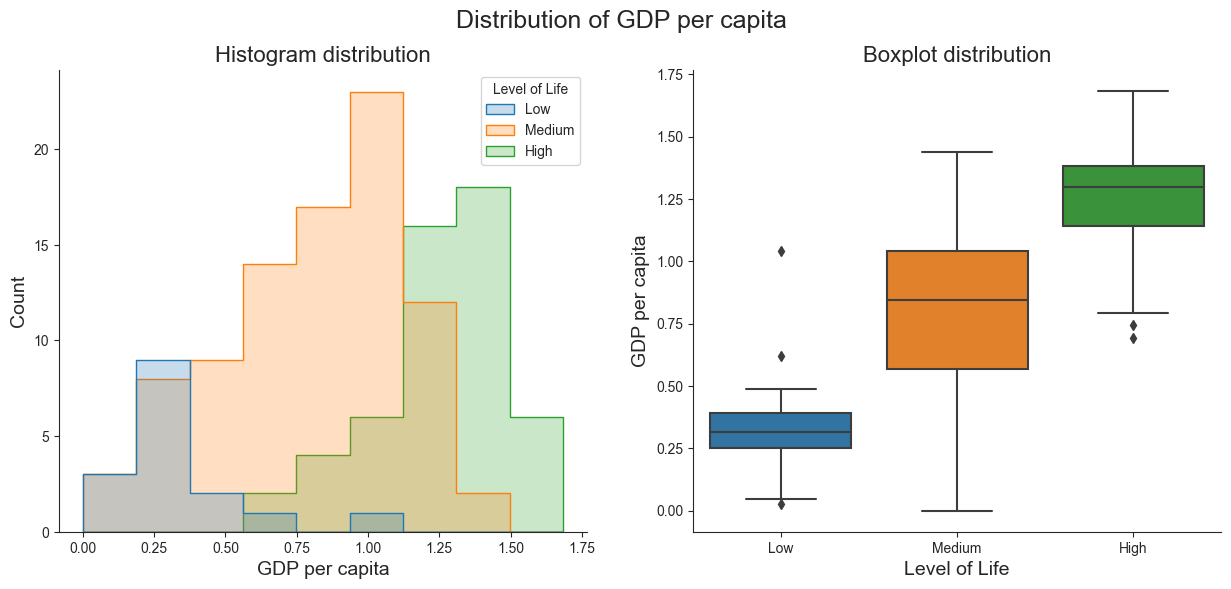

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of GDP per capita', fontsize=18)

sns.histplot(data=df, x='GDP per capita', hue='Level of Life', element='step', ax=ax[0])
ax[0].set_title('Histogram distribution', fontsize=16)
ax[0].set_xlabel('GDP per capita', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

sns.boxplot(data=df, x='Level of Life', y='GDP per capita');
ax[1].set_title('Boxplot distribution', fontsize=16)
ax[1].set_xlabel('Level of Life', fontsize=14)
ax[1].set_ylabel('GDP per capita', fontsize=14)

sns.despine()

## Violin plot

`Violin plot` вирішує проблему `Boxplot`'ів. Проте спочатку поясню що зображено на графіку `KDE Plot`.

Графік `KDE Plot`, так само як і гістограма, візуалізує розподіл наших даних. Гістограма робить це за допомогою прямокутників, `KDE Plot` у свою чергу будує для нас більш плавну лінію. Його є сенс використовувати, коли на одному графіку потрібно візуалізувати кілька розподілів, що перетенаються, як це зроблено нижче.

`Violin plot` - це більш інформативна версія `Boxplot`'у. Він несе у собі аналогічну інформацію, що і `Boxplot` (всередині `Violin plot`'у як раз побудована його дещо видозмінена версія), проте також візуалізує для нас сам розподіл даних за допомогою `KDE Plot`.

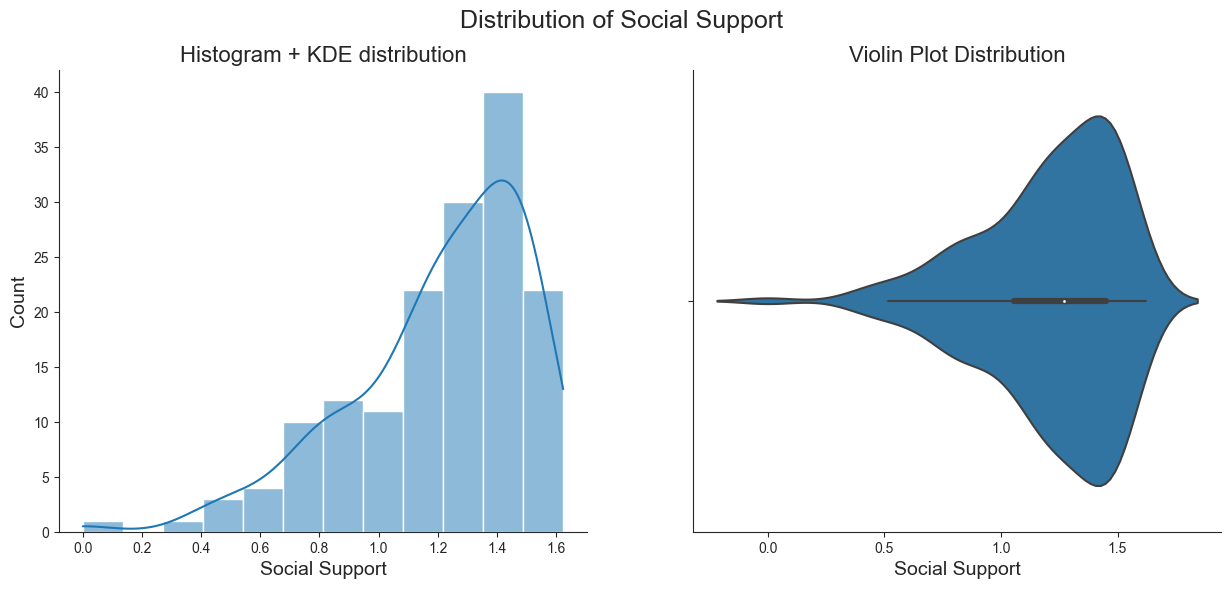

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of Social Support', fontsize=18)

sns.histplot(x=df['Social support'], kde=True, ax=ax[0])
ax[0].set_xlabel('Social Support', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_title('Histogram + KDE distribution', fontsize=16)

sns.violinplot(x=df['Social support'], ax=ax[1])
ax[1].set_title('Violin Plot Distribution', fontsize=16)
ax[1].set_xlabel('Social Support', fontsize=14)

sns.despine()

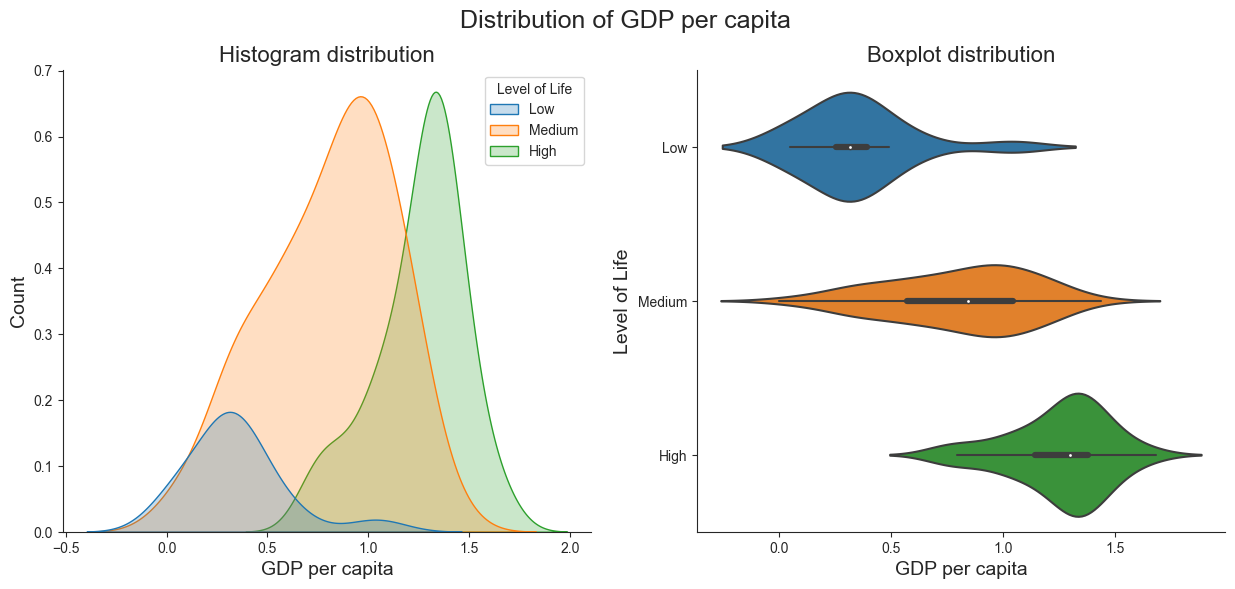

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of GDP per capita', fontsize=18)

sns.kdeplot(data=df, x='GDP per capita', hue='Level of Life', fill=True, ax=ax[0])
ax[0].set_title('Histogram distribution', fontsize=16)
ax[0].set_xlabel('GDP per capita', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

sns.violinplot(data=df, y='Level of Life', x='GDP per capita');
ax[1].set_title('Boxplot distribution', fontsize=16)
ax[1].set_ylabel('Level of Life', fontsize=14)
ax[1].set_xlabel('GDP per capita', fontsize=14)

sns.despine()

## QQ-Plot

`QQ-Plot` або `quantile-quantile plot` це візуальний спосіб прикинути, який розподіл має конкретний стовпчик.

В такому графіку по осі $x$ ми відкладаємо квантилі теоретично правильного розподілу (можемо обирати потрібний нам, в цьому прикладі я беру нормальний розподіл). По осі $y$ відкладаємо квантилі стовпця, для якого хочемо дізнатись розподіл.

Якщо точки лежать приблизно на одній прямій, це означає що наш стовпець має нормальний розподіл. Таку ситуацію видно на першому графіку.

Якщо нижній кінець графіка відхиляється більше ніж верхній, це означає що наш розподіл зміщений вправо. Таку ситуацію видно на другому графіку.

Якщо верхній кінець графіка відхиляється більше ніж нижній, це означає що наш розподіл зміщений вліво. Таку ситуацію видно на третьому графіку.

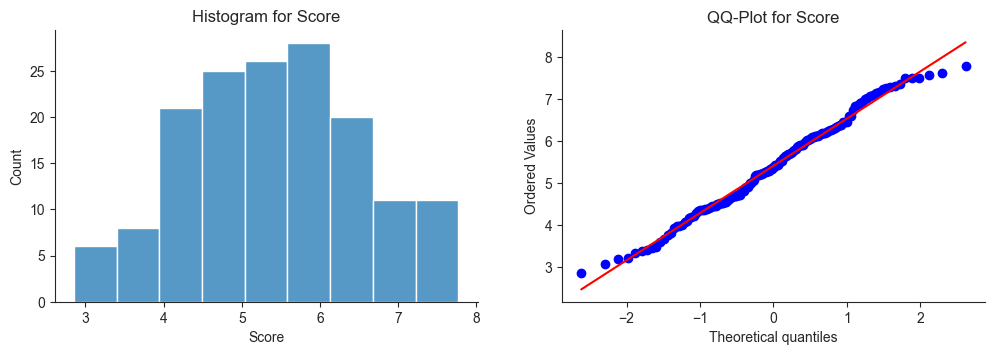

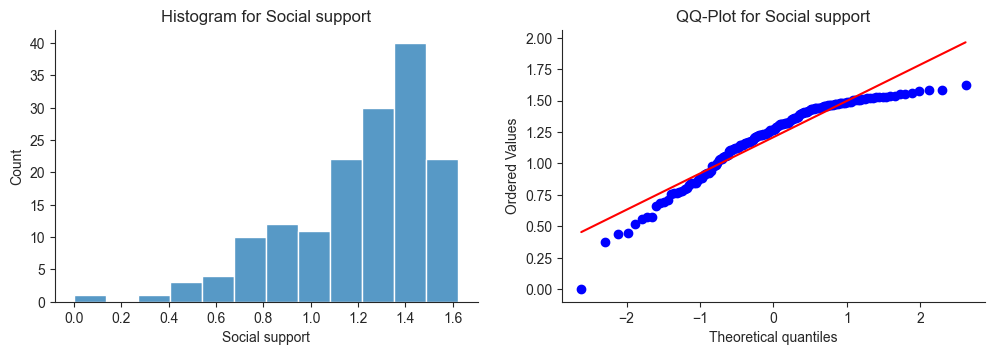

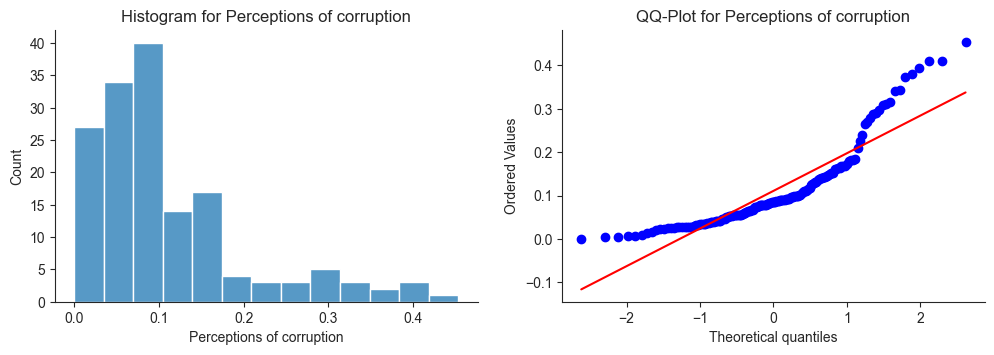

In [14]:
pos = 0
for col in ('Score', 'Social support', 'Perceptions of corruption'):
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(3, 2, pos+1)
    ax.set_title(f'Histogram for {col}')
    sns.histplot(data=df, x=col, ax=ax)
    ax = plt.subplot(3, 2, pos+2)
    probplot(df[col], plot=ax)
    plt.title(f'QQ-Plot for {col}')
    sns.despine()
    plt.show()
    pos += 2

## bar-plot

Графік схожий на гістограму зовнішньо, проте відрізняється за призначенням. На такому графіку ми можемо собі дозволити переміщати прямокутники місцями, чого не можна робити на гістограмі. Такий графік зазвичай використовується щоб показати числову характеристику, якісних стовпців.

Щоб візуально відрізняти цей графік від гістограми, часто в ньому роблять більшу відстань між прямокутниками.

Нижче кілька прикладів

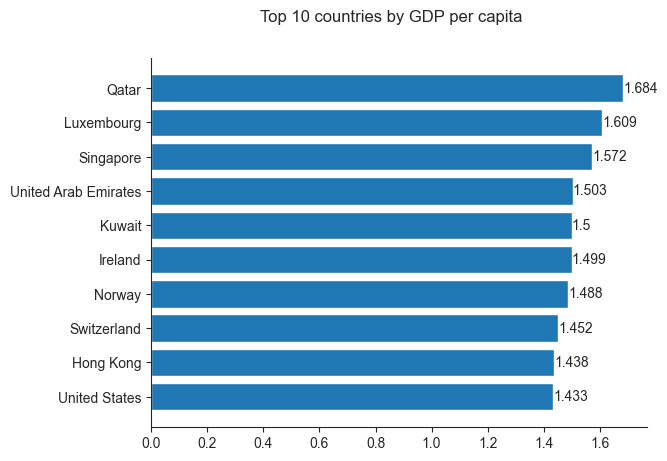

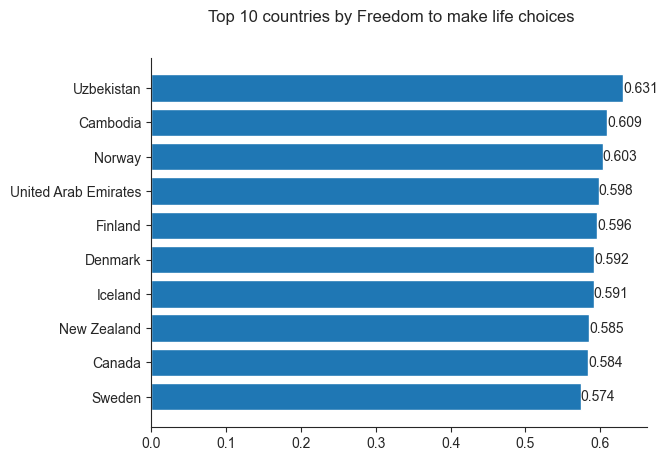

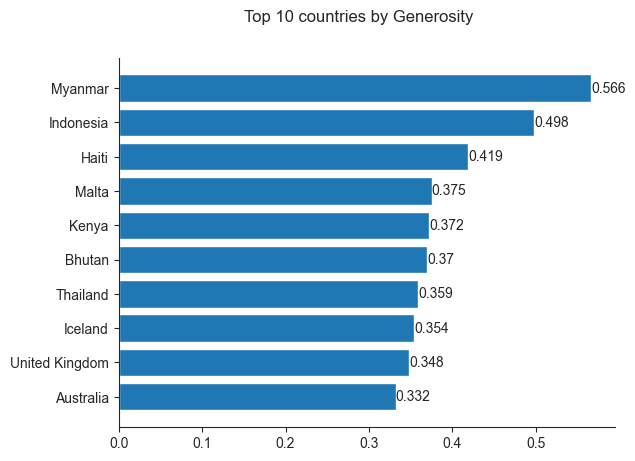

In [15]:
def plot_bars(n, cols):
    for col in cols:
        plt.suptitle(f'Top {n} countries by {col}')
        top_n = df.nlargest(n, col)
        container = plt.barh(top_n.loc[::-1, 'Country or region'], top_n.loc[::-1, col])
        plt.bar_label(container)
        sns.despine()
        plt.show()

cols = ('GDP per capita', 'Freedom to make life choices', 'Generosity')
plot_bars(10, cols)